### Import the libraries 

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Read the CSV File

In [5]:
df = pd.read_csv("gemstone.csv")

In [6]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


##### We don't need the id column, so drop it

In [8]:
df = df.drop(labels = ["id"], axis = 1)

In [9]:
df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


#### Dropping dimentionless features from columns x, y, and z

In [11]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(193563, 10)

### Eliminating the outliers from depth, table, y and z columns 

In [13]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(193561, 10)

##### Let us split the dataset into X(features) and y(labels)

In [15]:
X = df.drop(labels=["price"], axis=1)
y = df[["price"]]

##### We can change the columns CUT, COLOR, Clarity from qualitative into numerical, by using LabelEncoder

In [17]:
label_encoder = LabelEncoder()
##X["cut", "color", "clarity"] = label_encoder.fit_transform(X["cut", "color", "clarity"]) it doesn't work altogether
X["cut"] = label_encoder.fit_transform(X["cut"])
X["color"] = label_encoder.fit_transform(X["color"])
X["clarity"] = label_encoder.fit_transform(X["clarity"])

In [18]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,3,2,5,62.2,58.0,7.27,7.33,4.55
1,2.03,4,6,3,62.0,58.0,8.06,8.12,5.05
2,0.70,2,3,4,61.2,57.0,5.69,5.73,3.50
3,0.32,2,3,4,61.6,56.0,4.38,4.41,2.71
4,1.70,3,3,5,62.6,59.0,7.65,7.61,4.77


#### To scale the values, we use MinMaxScaler in the dataset

In [20]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
scaled_label = scaler.fit_transform(y)

#### Divide the data into train and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, scaled_label, test_size=0.15, random_state=42)

##### Define the model structure

In [24]:
model =  Sequential()
model.add(Input(shape=(9,)))

model.add(Dense(256, activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(256, activation="tanh"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="linear"))

In [25]:
model.compile(optimizer= Adam(),
             loss= "mse",
             metrics=["mae"])

In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0076 - mae: 0.0516 - val_loss: 0.0042 - val_mae: 0.0335
Epoch 2/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0036 - mae: 0.0374 - val_loss: 0.0026 - val_mae: 0.0311
Epoch 3/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0033 - mae: 0.0359 - val_loss: 0.0031 - val_mae: 0.0380
Epoch 4/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0031 - mae: 0.0344 - val_loss: 0.0029 - val_mae: 0.0369
Epoch 5/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0030 - mae: 0.0343 - val_loss: 0.0017 - val_mae: 0.0294
Epoch 6/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0030 - mae: 0.0342 - val_loss: 0.0024 - val_mae: 0.0286
Epoch 7/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0028 - mae: 0.0330 - val_loss: 0.0037 - val_mae: 0.0422
Epoch 8/50
2633/2633 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0028 - mae: 0.0329 - val_loss: 0.0022 - val_mae: 0.0310
Epoch 9/50
2633/2633 ━━━━━━━━━━━━━━━━━━━

In [27]:
loss, mae = model.evaluate(X_test, y_test)
print(f"MAE : {mae}")

908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - loss: 0.0016 - mae: 0.0271
MAE : 0.027035266160964966


In [28]:
predictions = model.predict(X_test)

908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step


#### Scale back the normalized values

In [30]:
scaledback_predictions = scaler.inverse_transform(predictions)
scaledback_labels = scaler.inverse_transform(y_test)

for i in range(6):
    print("Actual price:", scaledback_labels[i])
    print("Predicted price:", scaledback_predictions[i])

Actual price: [473.]
Predicted price: [1094.8735]
Actual price: [15984.]
Predicted price: [14712.116]
Actual price: [14844.]
Predicted price: [14496.705]
Actual price: [1260.]
Predicted price: [1748.8313]
Actual price: [1334.]
Predicted price: [1455.9861]
Actual price: [491.]
Predicted price: [1132.6498]


### Plot the performance of the model

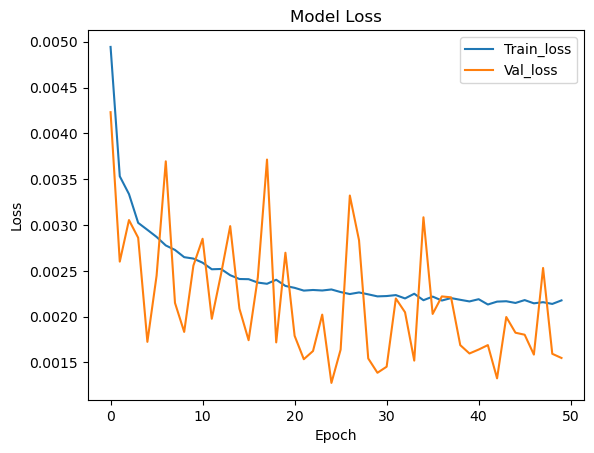

In [32]:
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

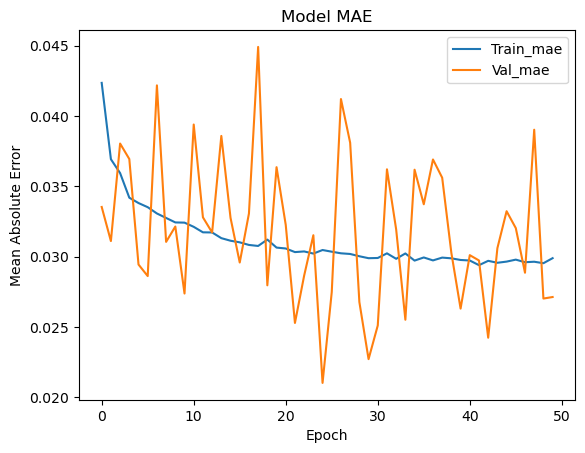

In [33]:
plt.plot(history.history['mae'], label='Train_mae')
plt.plot(history.history['val_mae'], label='Val_mae')
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()